# 🏦 Bank Marketing Campaign Prediction using Decision Tree Classifier

## 📘 Introduction
In this project, we analyze data from a Portuguese bank’s marketing campaign.  
The goal is to predict whether a client will **subscribe to a term deposit** based on demographic and campaign-related information.

### 🎯 Objective
- Apply a **Decision Tree Classifier** to predict customer subscription outcomes.
- Perform **Exploratory Data Analysis (EDA)** to understand key factors influencing decisions.
- Evaluate model performance and interpret decision paths.

### 📚 Tools Used
- Python (pandas, numpy, matplotlib, seaborn)
- scikit-learn (DecisionTreeClassifier)
- Google Colab (for notebook execution)


# Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data


In [4]:
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.info()
print("\nShape of the dataset:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB

Shape of the dataset: (4521, 17)


In [6]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# Exploratory Data Analysis

In [7]:
# Target variable distribution
df['y'].value_counts(normalize=True)

,proportion
y,
no,0.88476
yes,0.11524


/tmp/ipython-input-3248890448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


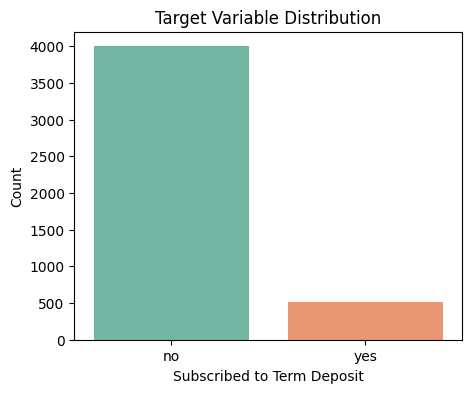

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x='y', data=df, palette='Set2')
plt.title('Target Variable Distribution')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


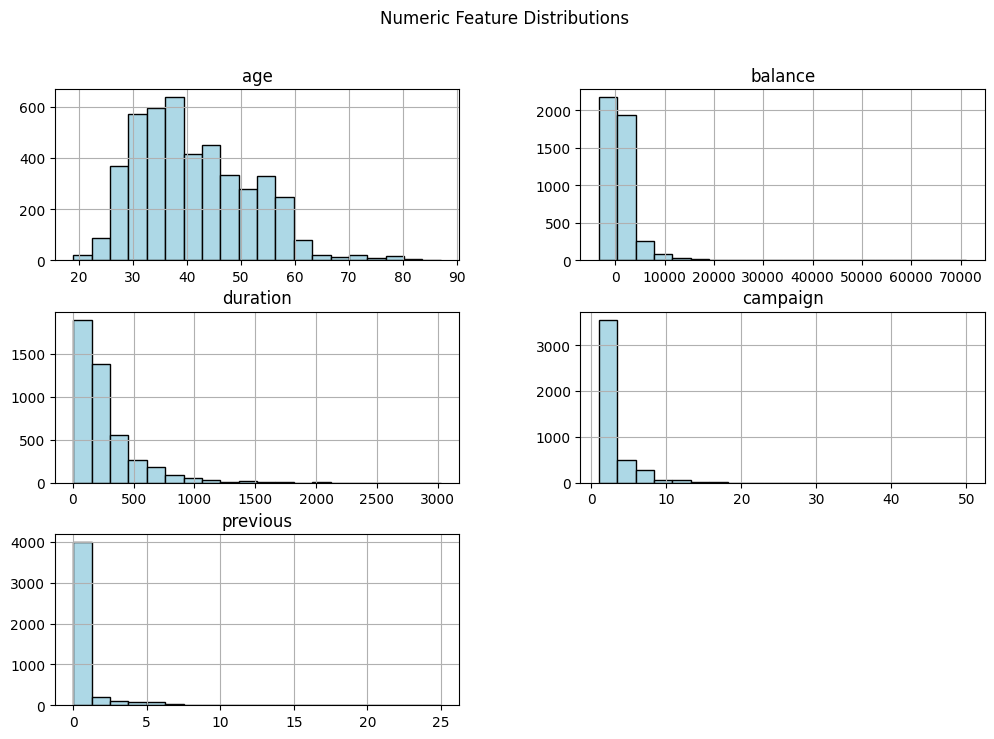

In [10]:
numeric_features = ['age', 'balance', 'duration', 'campaign', 'previous']
df[numeric_features].hist(bins=20, figsize=(12,8), color='lightblue', edgecolor='black')
plt.suptitle('Numeric Feature Distributions')
plt.show()

In [11]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

/tmp/ipython-input-4194559887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='Set3')
/tmp/ipython-input-4194559887.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital', data=df, palette='Set2')
/tmp/ipython-input-4194559887.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df, palette='Set1')
/tmp/ipython-input-4194559887.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

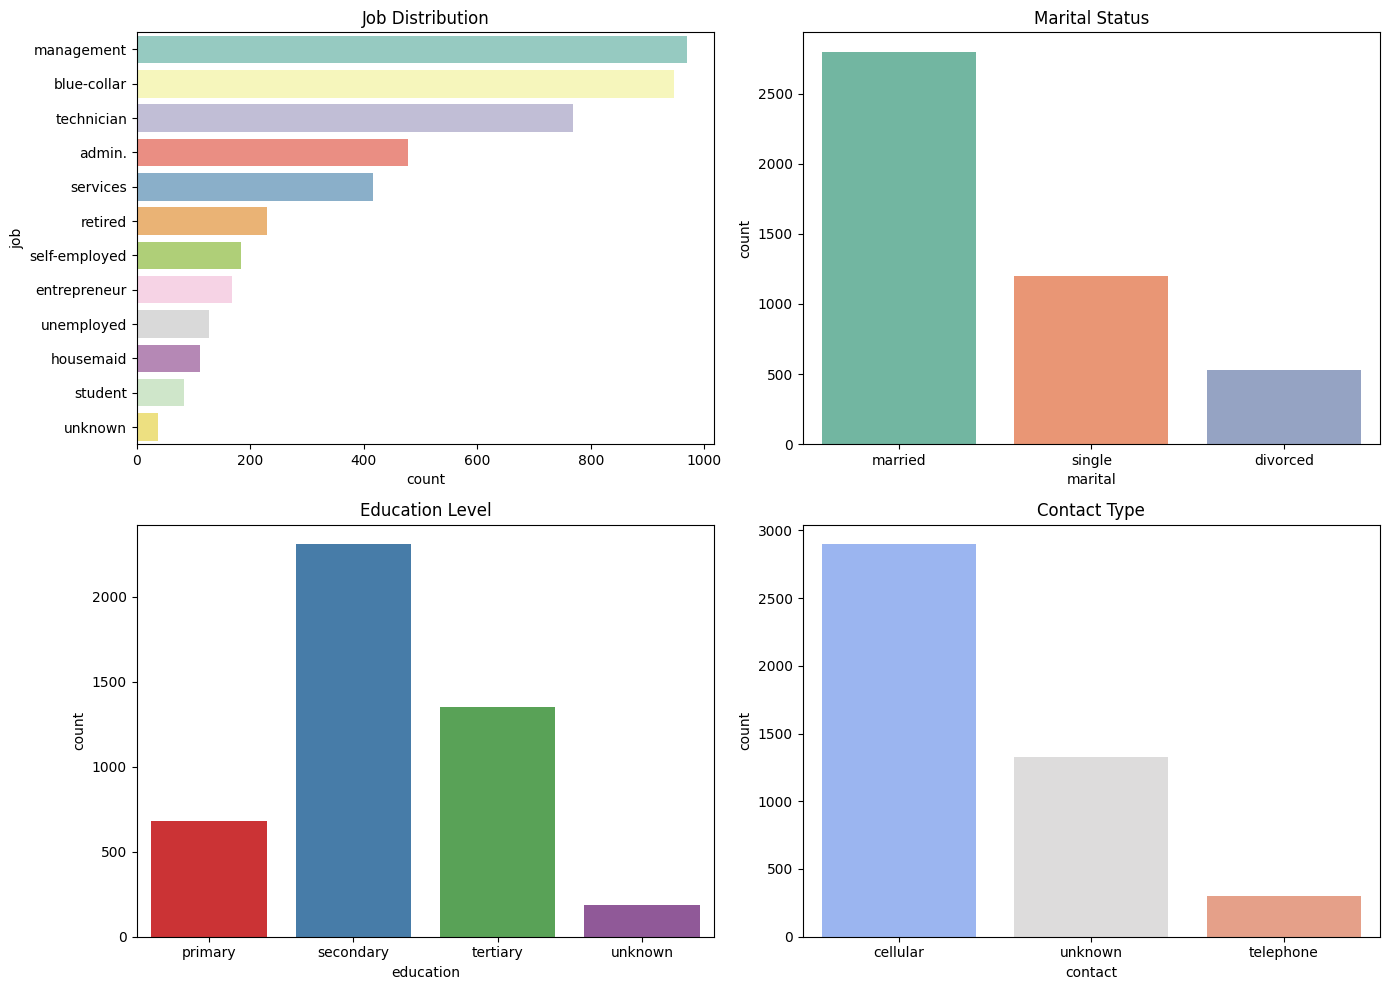

In [12]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='Set3')
plt.title('Job Distribution')

plt.subplot(2,2,2)
sns.countplot(x='marital', data=df, palette='Set2')
plt.title('Marital Status')

plt.subplot(2,2,3)
sns.countplot(x='education', data=df, palette='Set1')
plt.title('Education Level')

plt.subplot(2,2,4)
sns.countplot(x='contact', data=df, palette='coolwarm')
plt.title('Contact Type')

plt.tight_layout()
plt.show()

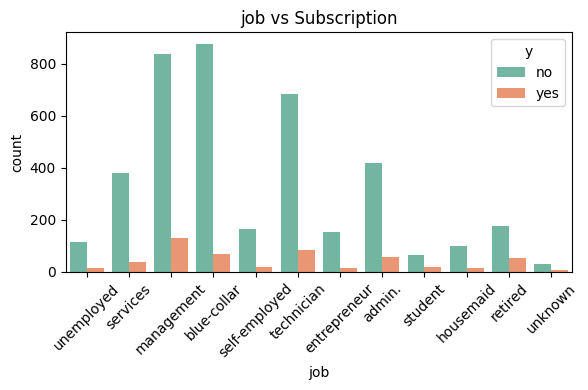

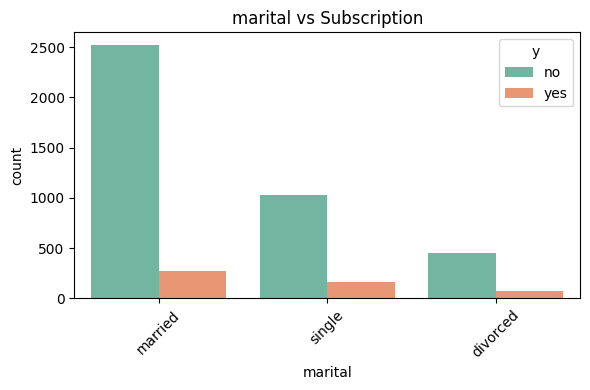

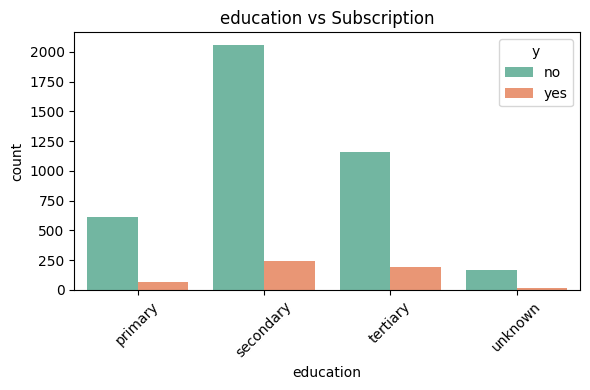

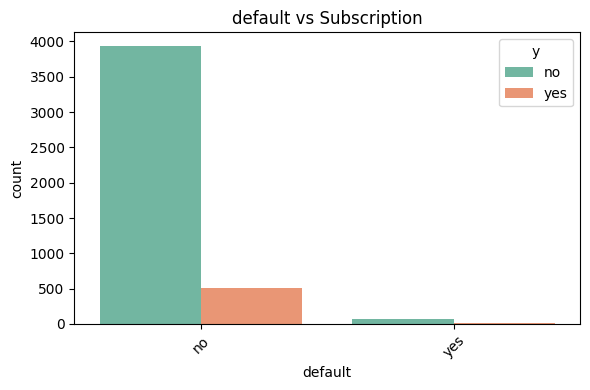

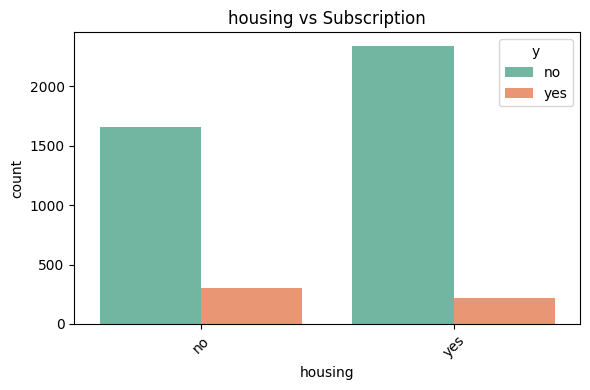

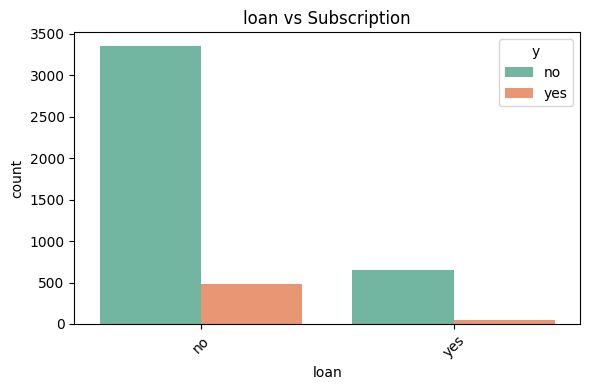

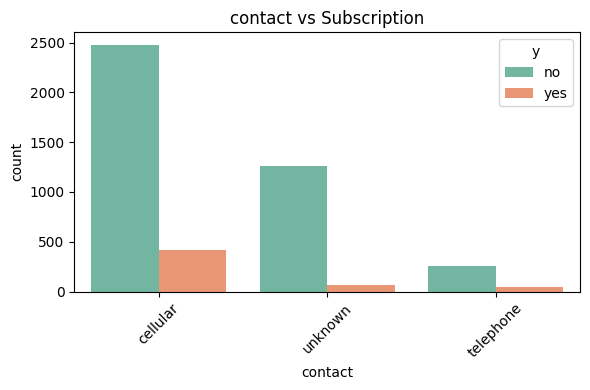

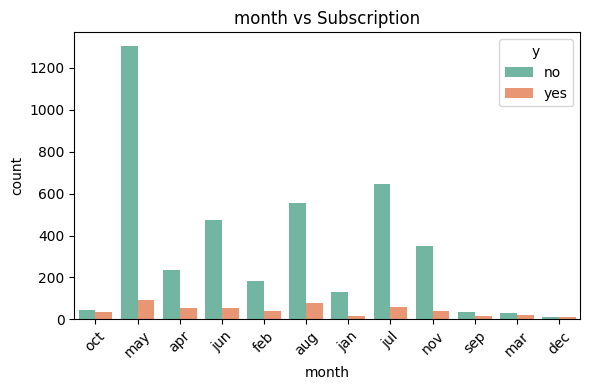

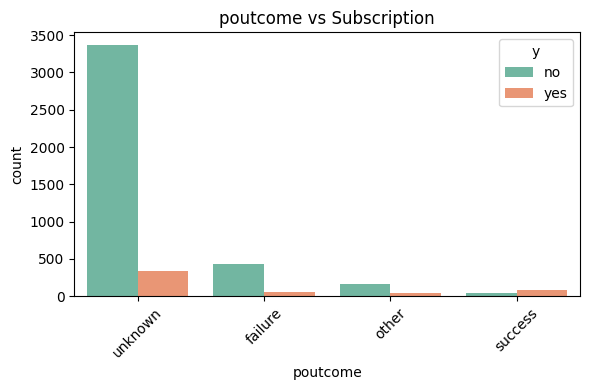

In [13]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='y', data=df, palette='Set2')
    plt.title(f'{col} vs Subscription')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


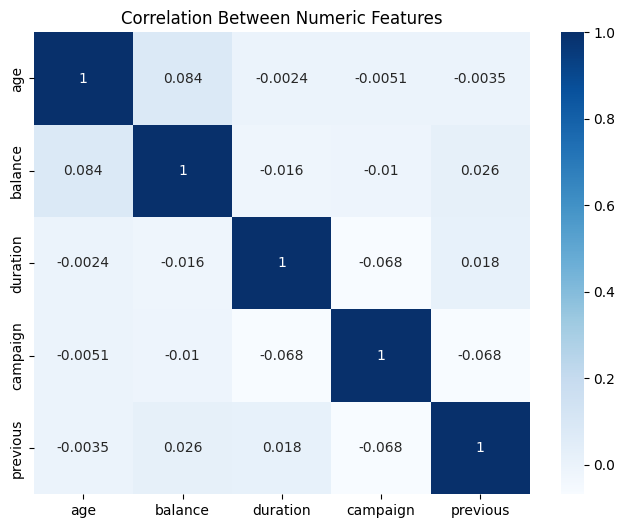

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Numeric Features')
plt.show()

# Preprocessing

## Importing modules

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier


## Seperate numeric and categorical features

In [16]:
X = df.drop('y', axis=1)
y = df['y']

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('y')

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


## Create preprocessing steps

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

## Create the pipeline

In [18]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))
])

## Split the dataset

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Fitting the model

In [20]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

## Making prediction

In [21]:
y_pred = model_pipeline.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

          no       0.91      0.97      0.94       801
         yes       0.55      0.31      0.40       104

    accuracy                           0.89       905
   macro avg       0.73      0.64      0.67       905
weighted avg       0.87      0.89      0.88       905

[[775  26]
 [ 72  32]]


# Hyperparameter tuning

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
Best Score: 0.7006313604502032


In [24]:
# Best model from grid search
best_pipeline = grid_search.best_estimator_

# Predict on test set
y_pred_best = best_pipeline.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred_best)

# Evaluation report
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Accuracy: 0.89
              precision    recall  f1-score   support

          no       0.92      0.96      0.94       801
         yes       0.52      0.35      0.42       104

    accuracy                           0.89       905
   macro avg       0.72      0.65      0.68       905
weighted avg       0.87      0.89      0.88       905

[[768  33]
 [ 68  36]]


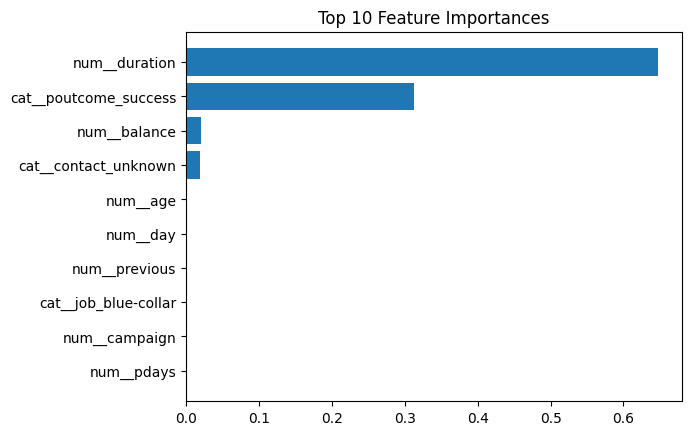

In [27]:
importances = best_pipeline.named_steps['classifier'].feature_importances_
feature_names = best_pipeline.named_steps['preprocessor'].get_feature_names_out()
fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
fi_df = fi_df.sort_values(by='importance', ascending=False).head(10)

plt.barh(fi_df['feature'], fi_df['importance'])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.show()